In [1]:
import numpy as np
import pandas as pd
import random, copy
import os
from sklearn.utils import shuffle
import keras
import tensorflow as tf
from sklearn import preprocessing

In [2]:
df = pd.read_csv("../input/induction-motor-multi-csv-files/combined_data_new.csv")
df["Label"].unique()

array([ 9.,  1.,  5.,  2.,  3.,  4.,  0., 10.,  6.])

In [3]:
df.iloc[0]

X_Value            0.000000
Acceleration      -5.351819
Acceleration_0     0.740582
Acceleration_1     8.295304
Voltage           -0.073965
Voltage_0         -0.435938
Voltage_1          0.510923
Voltage_2          0.000558
Voltage_3          0.187400
Label              9.000000
Speed             35.000000
Name: 0, dtype: float64

In [4]:
rows = len(df)
cols = len(df.iloc[0])
col_names = ['X_Value', 'Acceleration', 'Acceleration_0', 'Acceleration_1', 'Voltage', 'Voltage_0', 'Voltage_1',
             'Voltage_2', 'Voltage_3', 'Label', 'Speed']
df

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
0,0.00000,-5.351819,0.740582,8.295304,-0.073965,-0.435938,0.510923,0.000558,0.187400,9.0,35.0
1,0.00005,-4.234766,1.739646,9.915628,-0.078768,-0.442555,0.518180,0.000568,-0.171936,9.0,35.0
2,0.00010,-4.241035,-0.400662,4.644429,-0.077888,-0.434361,0.513546,0.000554,-0.182503,9.0,35.0
3,0.00015,-2.607558,-0.598338,1.464432,-0.084278,-0.440163,0.521092,0.000592,-0.020186,9.0,35.0
4,0.00020,-3.243099,-1.413354,-1.211480,-0.082729,-0.432257,0.516258,0.000537,-0.022895,9.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
3719295,29.90475,-0.172585,-1.122119,-2.568856,0.129924,-0.215732,0.082520,-0.000397,-0.193148,5.0,25.0
3719296,29.90480,0.501556,-1.841121,-3.171822,0.130463,-0.218068,0.089042,-0.000500,-0.027359,5.0,25.0
3719297,29.90485,1.899502,-0.382981,-1.162346,0.129154,-0.216884,0.086343,-0.000420,-0.030208,5.0,25.0
3719298,29.90490,0.161535,-1.047591,-0.886533,0.128612,-0.217536,0.091821,-0.000439,-0.009865,5.0,25.0


In [5]:
data_mat = []

In [6]:
k=0
L = rows/100
for i in range(int(L)):
    k=i*100
    data_mat.append(df.iloc[k:k+100])

In [7]:
print(len(data_mat))
data_mat[0]

37193


,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
0,0.00000,-5.351819,0.740582,8.295304,-0.073965,-0.435938,0.510923,0.000558,0.187400,9.0,35.0
1,0.00005,-4.234766,1.739646,9.915628,-0.078768,-0.442555,0.518180,0.000568,-0.171936,9.0,35.0
2,0.00010,-4.241035,-0.400662,4.644429,-0.077888,-0.434361,0.513546,0.000554,-0.182503,9.0,35.0
3,0.00015,-2.607558,-0.598338,1.464432,-0.084278,-0.440163,0.521092,0.000592,-0.020186,9.0,35.0
4,0.00020,-3.243099,-1.413354,-1.211480,-0.082729,-0.432257,0.516258,0.000537,-0.022895,9.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.00475,0.436281,-0.069400,3.124211,-0.236546,-0.150201,0.385401,0.000526,-0.017473,9.0,35.0
96,0.00480,0.198291,0.118823,4.801021,-0.240716,-0.145455,0.384172,0.000523,-0.062727,9.0,35.0
97,0.00485,0.444640,1.853832,7.944993,-0.235219,-0.143930,0.378396,0.000500,-0.000724,9.0,35.0
98,0.00490,0.039345,2.547296,8.979384,-0.239397,-0.139089,0.375958,0.000509,0.082752,9.0,35.0


In [8]:
random.shuffle(data_mat)
data_mat[0]

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
2313600,17.00000,-0.857298,-1.228816,-1.080006,-0.191042,-0.002580,0.194932,0.000087,0.073730,0.0,10.0
2313601,17.00005,0.020905,-0.094815,0.111957,-0.187110,-0.004804,0.191223,0.000121,0.094277,0.0,10.0
2313602,17.00010,-0.982440,-0.993568,-0.902829,-0.191740,-0.000744,0.194212,0.000022,0.004383,0.0,10.0
2313603,17.00015,-0.185492,0.037296,-0.288223,-0.187902,-0.003258,0.190645,0.000069,0.026892,0.0,10.0
2313604,17.00020,-1.192648,-0.904798,-1.503222,-0.192833,0.000374,0.193576,0.000111,-0.002847,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
2313695,17.00475,0.847846,0.083952,-0.021355,-0.218507,0.066169,0.151076,0.000157,0.049857,0.0,10.0
2313696,17.00480,1.262116,-0.172536,0.197237,-0.222730,0.069666,0.152838,0.000131,0.046404,0.0,10.0
2313697,17.00485,1.496296,-0.489309,0.096028,-0.218381,0.067324,0.150001,0.000124,0.045346,0.0,10.0
2313698,17.00490,1.950641,-0.625718,0.577689,-0.222715,0.070903,0.152011,0.000170,-0.017373,0.0,10.0


In [9]:
Label_col=[]
for i in range(len(data_mat)):
    Label_col.append(data_mat[i].iloc[0]['Label'])
    
print(np.unique(Label_col))
print(len(Label_col),len(data_mat))

[ 0.  1.  2.  3.  4.  5.  6.  9. 10.]
37193 37193


In [11]:
for i in range(len(Label_col)):
    if Label_col[i]>6:
        Label_col[i]=Label_col[i]-2

print(np.unique(Label_col))
print(len(Label_col),len(data_mat))

[0. 1. 2. 3. 4. 5. 6. 7. 8.]
37193 37193


In [12]:
i = random.randint(0,len(data_mat)-1)
print(Label_col[i],data_mat[i].iloc[93]['Label'])

4.0 4.0


In [13]:
data_mat_copy = copy.deepcopy(data_mat)
data_mat_copy[0]

,X_Value,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Label,Speed
2313600,17.00000,-0.857298,-1.228816,-1.080006,-0.191042,-0.002580,0.194932,0.000087,0.073730,0.0,10.0
2313601,17.00005,0.020905,-0.094815,0.111957,-0.187110,-0.004804,0.191223,0.000121,0.094277,0.0,10.0
2313602,17.00010,-0.982440,-0.993568,-0.902829,-0.191740,-0.000744,0.194212,0.000022,0.004383,0.0,10.0
2313603,17.00015,-0.185492,0.037296,-0.288223,-0.187902,-0.003258,0.190645,0.000069,0.026892,0.0,10.0
2313604,17.00020,-1.192648,-0.904798,-1.503222,-0.192833,0.000374,0.193576,0.000111,-0.002847,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
2313695,17.00475,0.847846,0.083952,-0.021355,-0.218507,0.066169,0.151076,0.000157,0.049857,0.0,10.0
2313696,17.00480,1.262116,-0.172536,0.197237,-0.222730,0.069666,0.152838,0.000131,0.046404,0.0,10.0
2313697,17.00485,1.496296,-0.489309,0.096028,-0.218381,0.067324,0.150001,0.000124,0.045346,0.0,10.0
2313698,17.00490,1.950641,-0.625718,0.577689,-0.222715,0.070903,0.152011,0.000170,-0.017373,0.0,10.0


In [14]:
for i in range(len(data_mat_copy)):
    data_mat_copy[i].drop(['Label'],axis=1, inplace=True)
    data_mat_copy[i].drop(['X_Value'],axis=1, inplace=True)
col_names.remove('Label')
col_names.remove('X_Value')
data_mat_copy[0]

,Acceleration,Acceleration_0,Acceleration_1,Voltage,Voltage_0,Voltage_1,Voltage_2,Voltage_3,Speed
2313600,-0.857298,-1.228816,-1.080006,-0.191042,-0.002580,0.194932,0.000087,0.073730,10.0
2313601,0.020905,-0.094815,0.111957,-0.187110,-0.004804,0.191223,0.000121,0.094277,10.0
2313602,-0.982440,-0.993568,-0.902829,-0.191740,-0.000744,0.194212,0.000022,0.004383,10.0
2313603,-0.185492,0.037296,-0.288223,-0.187902,-0.003258,0.190645,0.000069,0.026892,10.0
2313604,-1.192648,-0.904798,-1.503222,-0.192833,0.000374,0.193576,0.000111,-0.002847,10.0
...,...,...,...,...,...,...,...,...,...
2313695,0.847846,0.083952,-0.021355,-0.218507,0.066169,0.151076,0.000157,0.049857,10.0
2313696,1.262116,-0.172536,0.197237,-0.222730,0.069666,0.152838,0.000131,0.046404,10.0
2313697,1.496296,-0.489309,0.096028,-0.218381,0.067324,0.150001,0.000124,0.045346,10.0
2313698,1.950641,-0.625718,0.577689,-0.222715,0.070903,0.152011,0.000170,-0.017373,10.0


In [15]:
data_list = []
for i in range(len(data_mat_copy)):
    data_list.append(data_mat_copy[i].values.tolist())

In [ ]:
# max_acc_0 = max_acc_1 = max_acc_2 = max_vol_0 = max_vol_1 = max_vol_2 = max_vol_3 = -1000.0
# min_acc_0 = min_acc_1 = min_acc_2 = min_vol_0 = min_vol_1 = min_vol_2 = min_vol_3 = 1000.0
# for i in range(len(data_list)):
#     for j in range(100):
#         max_acc_0 = max(max_acc_0, data_list[i][j][0])
#         max_acc_1 = max(max_acc_1, data_list[i][j][1])
#         max_acc_2 = max(max_acc_2, data_list[i][j][2])
#         min_acc_0 = min(min_acc_0, data_list[i][j][0])
#         min_acc_1 = min(min_acc_1, data_list[i][j][1])
#         min_acc_2 = min(min_acc_2, data_list[i][j][2])
        
#         max_vol_0 = max(max_vol_0, data_list[i][j][3])
#         max_vol_1 = max(max_vol_1, data_list[i][j][4])
#         max_vol_2 = max(max_vol_2, data_list[i][j][5])
#         max_vol_3 = max(max_vol_3, data_list[i][j][6])
#         min_vol_0 = min(min_vol_0, data_list[i][j][3])
#         min_vol_1 = min(min_vol_1, data_list[i][j][4])
#         min_vol_2 = min(min_vol_2, data_list[i][j][5])
#         min_vol_3 = min(min_vol_3, data_list[i][j][6])
        
# for i in range(len(data_list)):
#     for j in range(100):
        
#         data_list[i][j][0] = (data_list[i][j][0]-min_acc_0)/(max_acc_0-min_acc_0)
#         data_list[i][j][1] = (data_list[i][j][1]-min_acc_1)/(max_acc_1-min_acc_1)
#         data_list[i][j][2] = (data_list[i][j][2]-min_acc_2)/(max_acc_2-min_acc_2)
        
#         data_list[i][j][3] = (data_list[i][j][3]-min_vol_0)/(max_vol_0-min_vol_0)
#         data_list[i][j][4] = (data_list[i][j][4]-min_vol_1)/(max_vol_1-min_vol_1)
#         data_list[i][j][5] = (data_list[i][j][5]-min_vol_2)/(max_vol_2-min_vol_2)
#         data_list[i][j][6] = (data_list[i][j][6]-min_vol_3)/(max_vol_3-min_vol_3)
        
#         data_list[i][j][7] = data_list[i][j][7]/40.0
        

In [ ]:
# print(max_acc_0, min_acc_0)
# print(max_acc_1, min_acc_1)
# print(max_acc_2, min_acc_2)
# print(max_vol_0, min_vol_0)
# print(max_vol_1, min_vol_1)
# print(max_vol_2, min_vol_2)
# print(max_vol_3, min_vol_3)

In [16]:
print(np.shape(data_list),np.shape(Label_col))

(37193, 100, 9) (37193,)


In [17]:
pd.DataFrame(data_list[0])

,0,1,2,3,4,5,6,7,8
0,-0.857298,-1.228816,-1.080006,-0.191042,-0.002580,0.194932,0.000087,0.073730,10.0
1,0.020905,-0.094815,0.111957,-0.187110,-0.004804,0.191223,0.000121,0.094277,10.0
2,-0.982440,-0.993568,-0.902829,-0.191740,-0.000744,0.194212,0.000022,0.004383,10.0
3,-0.185492,0.037296,-0.288223,-0.187902,-0.003258,0.190645,0.000069,0.026892,10.0
4,-1.192648,-0.904798,-1.503222,-0.192833,0.000374,0.193576,0.000111,-0.002847,10.0
...,...,...,...,...,...,...,...,...,...
95,0.847846,0.083952,-0.021355,-0.218507,0.066169,0.151076,0.000157,0.049857,10.0
96,1.262116,-0.172536,0.197237,-0.222730,0.069666,0.152838,0.000131,0.046404,10.0
97,1.496296,-0.489309,0.096028,-0.218381,0.067324,0.150001,0.000124,0.045346,10.0
98,1.950641,-0.625718,0.577689,-0.222715,0.070903,0.152011,0.000170,-0.017373,10.0


# **LSTM Model in Keras**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers, models
import sklearn.metrics as metrics

**Test Data Prep**

In [19]:
from sklearn.model_selection import train_test_split

X = copy.deepcopy(data_list)
y = copy.deepcopy(Label_col)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

33473 33473 3720 3720


In [21]:
print(np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test))
y_train = tf.keras.utils.to_categorical(y_train, 9)
y_test = tf.keras.utils.to_categorical(y_test, 9)
print(np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test))

(33473, 100, 9) (33473,) (3720, 100, 9) (3720,)
(33473, 100, 9) (33473, 9) (3720, 100, 9) (3720, 9)


In [22]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train.shape, y_train.shape


((33473, 100, 9), (33473, 9))

In [23]:
verbose,batch_size = 1,64
timesteps, features, labels = X_train.shape[1], X_train.shape[2], y_train.shape[1]

In [24]:
model = models.Sequential()
model.add(layers.LSTM(256, input_shape=(timesteps,features),return_sequences=True))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(labels, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 256)          272384    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
Total params: 359,305
Trainable params: 359,305
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(lr=0.003, decay=1e-6), metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=100, validation_data =(X_test,y_test), batch_size=batch_size, verbose=verbose)

Epoch 1/100
524/524 [==============================] - 17s 21ms/step - loss: 1.8711 - accuracy: 0.2729 - val_loss: 0.8918 - val_accuracy: 0.6245
Epoch 2/100
524/524 [==============================] - 10s 19ms/step - loss: 0.8103 - accuracy: 0.6644 - val_loss: 0.5631 - val_accuracy: 0.7602
Epoch 3/100
524/524 [==============================] - 10s 19ms/step - loss: 0.5629 - accuracy: 0.7642 - val_loss: 0.4476 - val_accuracy: 0.8191
Epoch 4/100
524/524 [==============================] - 10s 19ms/step - loss: 0.3925 - accuracy: 0.8422 - val_loss: 0.3070 - val_accuracy: 0.8726
Epoch 5/100
524/524 [==============================] - 10s 19ms/step - loss: 0.2672 - accuracy: 0.8958 - val_loss: 0.3716 - val_accuracy: 0.8715
Epoch 6/100
524/524 [==============================] - 10s 19ms/step - loss: 0.2844 - accuracy: 0.8922 - val_loss: 0.2015 - val_accuracy: 0.9223
Epoch 7/100
524/524 [==============================] - 10s 19ms/step - loss: 0.1344 - accuracy: 0.9446 - val_loss: 0.1025 - val_ac

In [28]:
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=verbose)

59/59 [==============================] - 0s 8ms/step - loss: 0.0690 - accuracy: 0.9702


In [29]:
print("Accuracy {}".format(accuracy))

Accuracy 0.9701613187789917


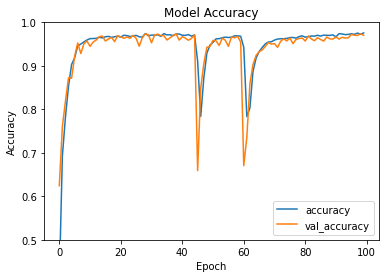

In [30]:
import matplotlib.pyplot as plt
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


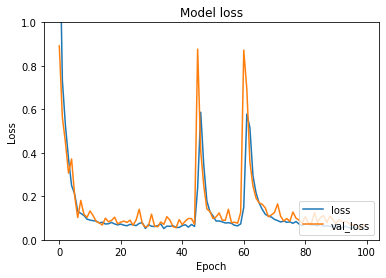

In [31]:
plt.title('Model loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

**Cofusion Matrix Added**

defects = {'nd':0.0, 'bf':1.0, 'ur':2.0, 'brf':3.0, 'rm':4.0, 'brbf':5.0, 'vusff':6.0, 'puspf':7.0, 'mpuspf':8.0, 'mswf':9.0, 'swf':10.0}

In [32]:
Class_names = [
'ND',
'BF',
'UR',
'BRF',
'RM',
'BRBF',
'VUSFF',
'PUSPF',
'MPUSPF',
'MSWF',
'SWF']

Class_names.remove('PUSPF')
Class_names.remove('MPUSPF')

In [33]:
Y_pred = model.predict_classes(X_test)
y_test = np.argmax(y_test, axis=1)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [34]:
Y_pred

array([6, 2, 6, ..., 4, 6, 4])

In [35]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=Y_pred)

In [36]:
confusion_matrix

array([[420,   0,   2,   0,   0,   1,   0,   0,   0],
       [  0, 386,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1, 407,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0, 434,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0, 381,   0,   0,   0,   0],
       [  1,   0,   5,   0,   0, 387,   2,   0,   0],
       [  3,   0,   0,   0,   2,   6, 466,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0, 390,   4],
       [  0,   1,   0,   0,   0,   0,   0,  77, 338]])

In [37]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()



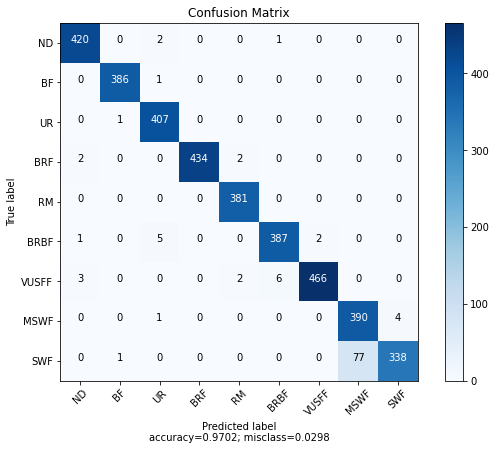

In [38]:
plot_confusion_matrix(confusion_matrix, 
                      normalize    = False,
                      target_names = Class_names,
                      title        = "Confusion Matrix")



In [39]:
report = metrics.classification_report(y_test, Y_pred)
print(report)  

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       423
           1       0.99      1.00      1.00       387
           2       0.98      1.00      0.99       408
           3       1.00      0.99      1.00       438
           4       0.99      1.00      0.99       381
           5       0.98      0.98      0.98       395
           6       1.00      0.98      0.99       477
           7       0.84      0.99      0.90       395
           8       0.99      0.81      0.89       416

    accuracy                           0.97      3720
   macro avg       0.97      0.97      0.97      3720
weighted avg       0.97      0.97      0.97      3720



In [40]:
# save model and architecture to single file
model.save("Model_LSTM_9_Classes.h5")
print("Saved model to disk")

Saved model to disk
